In [147]:
# Load the data
import csv
import numpy as np
from pprint import pprint

with open("./data/food-survey.csv") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return np.nan if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            # if "Coke" in raw_data[0][col]:
            #     continue
            data[-1].append(convert(row[col]))
    
    mat = np.array(data).T

print(mat, mat.shape)

[[nan  7.  5. ...  6.  4.  5.]
 [nan  5.  2. ...  2.  1.  4.]
 [nan nan nan ... nan  3.  6.]
 ...
 [ 7.  1.  4. ...  5.  4.  6.]
 [nan  3.  6. ...  2.  4.  2.]
 [nan  1.  3. ... nan nan  2.]] (50, 56)


In [148]:
# Get food labels
import re

pattern = r".*?\[(.*)].*"
food_labels = [re.findall(pattern, header)[0] for header in raw_data[0][3:-2]]

In [149]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

# Fill in nans with means
col_mean = np.nanmean(mat, axis=0)
inds = np.where(np.isnan(mat))
mat[inds] = np.take(col_mean, inds[1])

# Standardize features?
mat = StandardScaler().fit_transform(mat)

Mean of nonzero entries: 4.454726765057838
Count of nonzero entries: 2507


In [150]:
# Let's do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

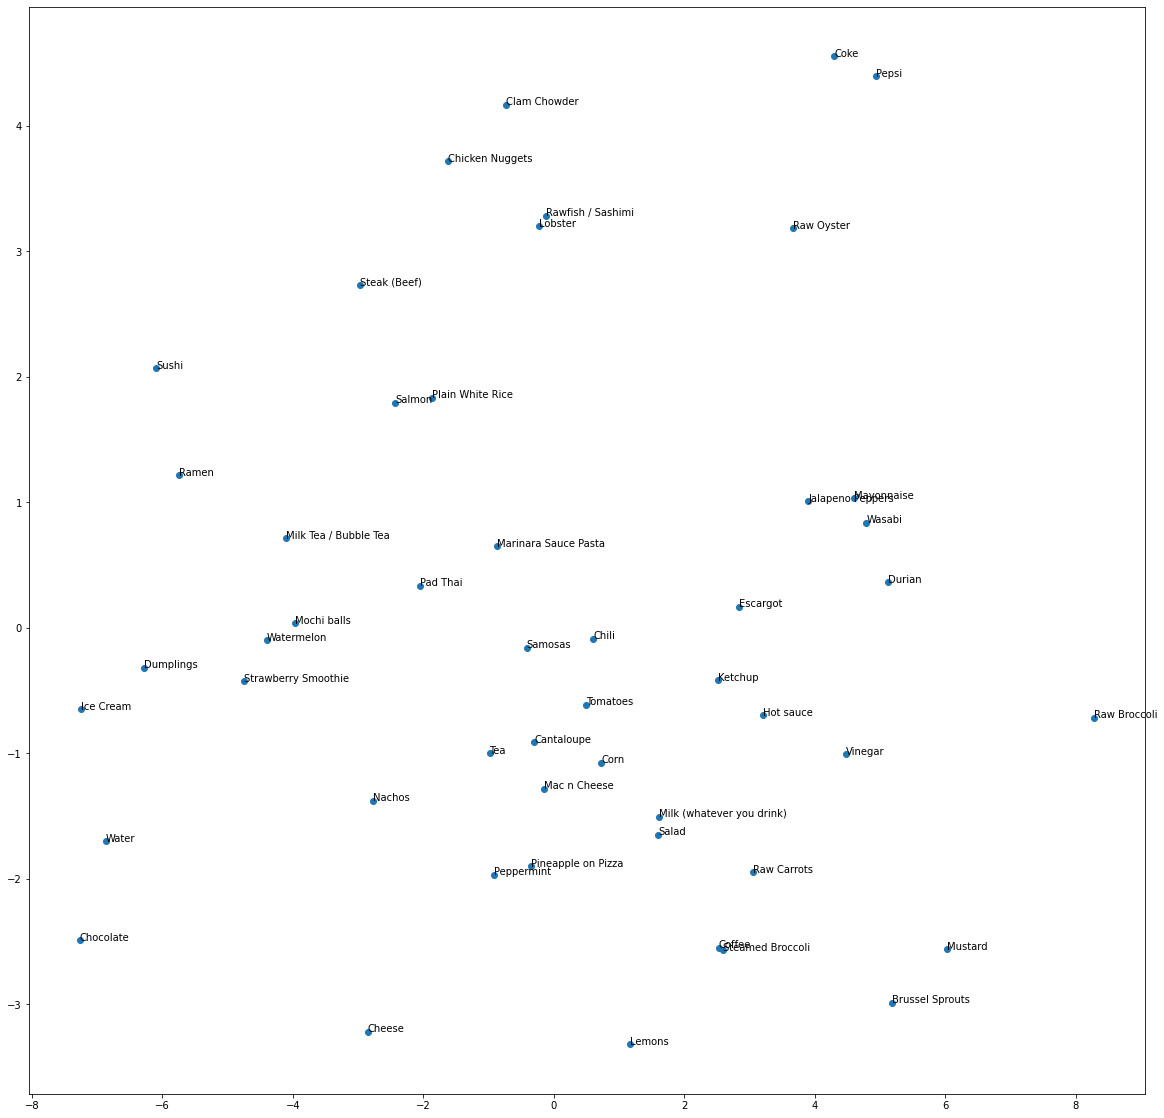

In [151]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(20, 20))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

for food, coords in zip(food_labels, pc_2):
    plt.annotate(food, coords)

# Let's find cool correlations

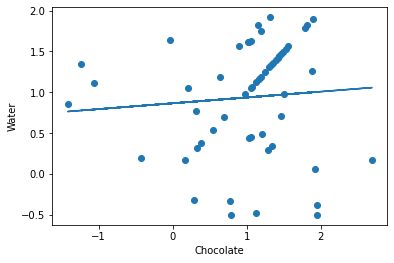

In [132]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x))


correlation("Chocolate", "Water")